Install required libraries 

In [1]:
! pip install fastai2

     |████████████████████████████████| 184kB 3.4MB/s 


In [3]:
! pip install nbdev #why we use this?

Download Data

In [4]:
!git clone https://github.com/marylicious/Rock-Paper-Scissors

Cloning into 'Rock-Paper-Scissors'...
remote: Enumerating objects: 2193, done.
remote: Total 2193 (delta 0), reused 0 (delta 0), pack-reused 2193
Receiving objects: 100% (2193/2193), 152.64 MiB | 30.58 MiB/s, done.
Checking out files: 100% (2188/2188), done.


In [0]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *

In [0]:
hands = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [0]:
path = Path('Rock-Paper-Scissors')

In [0]:
dls = hands.dataloaders(path)

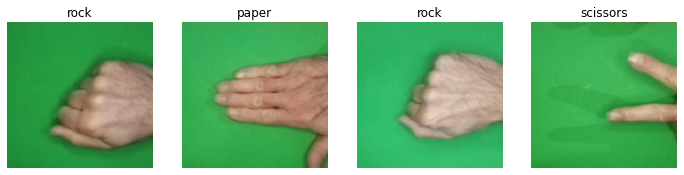

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

In [0]:
hands = hands.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = hands.dataloaders(path)

In [0]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)


In [0]:
EPOCH_NUM = 10

In [69]:
learn.fine_tune(EPOCH_NUM)

epoch,train_loss,valid_loss,error_rate,time
0,0.109954,0.061172,0.016768,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.097552,0.022005,0.006098,00:13
1,0.074041,0.022227,0.003049,00:13
2,0.062734,0.009807,0.003049,00:13
3,0.064713,0.055561,0.007622,00:13
4,0.049716,0.017423,0.003049,00:13
5,0.048624,0.030577,0.009146,00:13
6,0.037139,0.011500,0.003049,00:13
7,0.026864,0.009072,0.003049,00:13
8,0.021016,0.007285,0.003049,00:13
9,0.016668,0.007172,0.003049,00:13


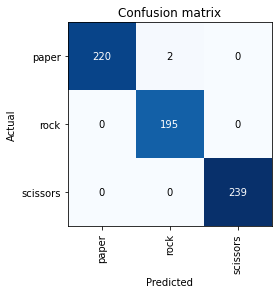

In [70]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

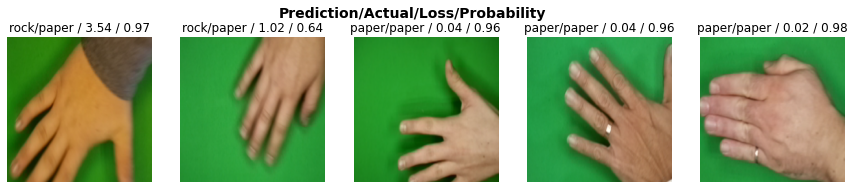

In [71]:
interp.plot_top_losses(5, nrows=1)

In [72]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [0]:
#Change images we decided to change - (it didn't work !!)
for idx,cat in cleaner.change(): shutil.move(cleaner.fns[idx], path/cat)

### Exporting and Loading

Export model

In [0]:
MODEL_NAME = 'model.pkl'

In [0]:
learn.export(f'{path}/{MODEL_NAME}')

In [0]:
#QUESTION what's this?
#dls.train.get_idxs = lambda: Inf.ones

Load model

In [0]:
learn_inf = load_learner(f'{path}/{MODEL_NAME}')

In [29]:
learn_inf.dls.vocab

(#3) ['paper','rock','scissors']

In [34]:
learn_inf.predict(f'{path}/paper.jpeg') #you need to upload paper.jpeg first

('rock', tensor(1), tensor([1.7593e-04, 9.9972e-01, 1.0609e-04]))

### Notebook App

In [31]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
btn_upload = SimpleNamespace(data = [f'{path}/paper.jpeg'])
btn_upload

namespace(data=['Rock-Paper-Scissors/paper.jpeg'])

In [0]:
img = PILImage.create(btn_upload.data[-1])

In [40]:
out_pl = widgets.Output() 
#Output is a widget that acts as a placeholder
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [43]:
pred,pred_idx,probs = learn_inf.predict(img)

tensor([1.7593e-04, 9.9972e-01, 1.0609e-04])

In [44]:
pred

'rock'

In [45]:
pred_idx

tensor(1)

In [46]:
probs

tensor([1.7593e-04, 9.9972e-01, 1.0609e-04])

In [56]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: rock; Probability: 0.9997')

In [57]:
btn_run = widgets.Button(description='Classify')
#btn_run

Button(description='Classify', style=ButtonStyle())

In [59]:
#Add click event
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_run

Button(description='Classify', style=ButtonStyle())

In [0]:
btn_upload = widgets.FileUpload()

In [61]:
VBox([widgets.Label('Select your choice!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning it into an app


In [1]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
